In [19]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import pylab 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, probplot
%matplotlib inline
import statsmodels.api as sm

pal = sns.color_palette()
pd.set_option("display.max_columns", 50)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.tools as tls

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [2]:
data = pd.read_excel('0173eeb640e7-Challenge+Data+Set+-+Campus+Analytics+2020.xlsx')
data_val = pd.read_excel('d59675225279-Evaluation+Data+Set+-+Campus+Analytics+2020.xlsx')

In [10]:
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,XC,y
0,0.985703,0.899527,2.332283,1.044273,1.141718,-1.656647,-1.409265,1.043518,-0.931461,-1.726754,0.149757,0.723953,0.654222,-0.128981,-0.448738,0.001453,1.068472,0.547043,-1.446777,0.846647,1.385378,0.217853,0.628801,0.511403,0.562767,-0.356514,0.867604,-0.218642,-0.336591,0.096781,C,0
1,0.539816,0.243602,1.636048,-0.562150,-0.235560,-1.316039,1.529069,-1.415871,-1.167266,-0.103195,1.264812,-0.046112,-0.052789,0.713823,0.489074,1.449449,-0.241008,-1.530879,-0.140254,-2.218684,0.129662,2.020398,0.734907,0.929244,-0.805046,0.268788,1.025799,1.112271,1.492585,-0.497020,E,0
2,-1.424483,-0.470533,0.095100,0.131981,1.168902,-0.827530,-1.233111,0.556679,-1.384065,-1.197944,-0.401762,0.242434,-1.063001,-0.000186,-1.625695,0.549367,1.792426,-0.684977,0.380994,-0.007497,0.640268,1.470933,-1.398526,-2.139636,-1.238090,-0.139802,-2.317249,0.113483,0.521594,1.269208,E,0
3,-1.034157,-1.054496,0.339467,-0.829151,0.012123,0.048887,0.573195,-0.189184,-0.674289,0.975835,-0.040081,-0.119562,0.765592,-0.589195,0.054909,0.670680,0.034362,-1.151614,-0.598841,0.278923,2.565787,0.881025,0.305298,-0.368107,-0.664859,0.225715,-0.865773,-0.026332,-0.209023,0.074814,E,0
4,0.177091,1.154216,1.004133,-0.724015,-0.508090,-0.478284,-0.524431,1.841560,-1.147140,0.435025,-0.385504,-1.895292,0.336079,-0.706587,0.058675,-0.318922,0.252725,-0.756372,-1.619190,-0.413788,0.909173,0.515647,1.095991,-0.993104,-0.775456,0.938553,0.662388,0.483111,-0.910481,1.544431,E,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.127214,-0.644439,-0.356251,-1.188522,0.646979,-1.018895,-0.153524,-0.102938,1.109257,0.173160,-0.188674,-0.088169,0.843558,1.075656,1.770062,-2.276914,0.136055,1.258887,0.311050,-0.468410,-1.267298,0.828288,-1.362069,-2.267345,0.329806,0.255234,-1.145799,0.673261,-0.072575,0.233888,A,1
2996,0.427700,1.460896,-1.260326,2.206359,-0.981929,0.045186,0.406928,-0.409999,0.602068,-1.145479,0.556425,-0.157087,1.636547,0.860019,0.493489,-1.179582,-0.223230,-0.191313,-0.334412,-1.815481,2.045879,0.350893,0.558446,-1.430444,0.067506,-0.865400,0.571944,1.172911,-0.917354,0.126003,C,0
2997,-0.880540,0.678472,0.493897,-0.118869,0.005285,-0.201233,-0.601732,-0.747260,-0.413440,-1.144848,0.620897,-0.606322,-1.050082,-0.223199,-1.213268,0.094096,1.385225,1.131449,-2.645446,-2.195989,-0.615433,1.959871,0.924523,-0.304820,0.153800,0.316073,0.243841,-1.641217,0.287025,0.591607,B,1
2998,0.151291,-0.949928,-1.960683,-1.352557,2.221015,-0.775556,0.932388,-0.963642,0.649496,-1.658190,1.491049,0.325477,0.077016,-0.563154,-0.598902,0.173198,1.100410,-0.191733,-1.457368,-0.085871,0.786170,-1.576338,0.896517,-0.586427,-0.314806,-0.048052,0.142921,1.057203,-1.335579,-0.108947,B,0


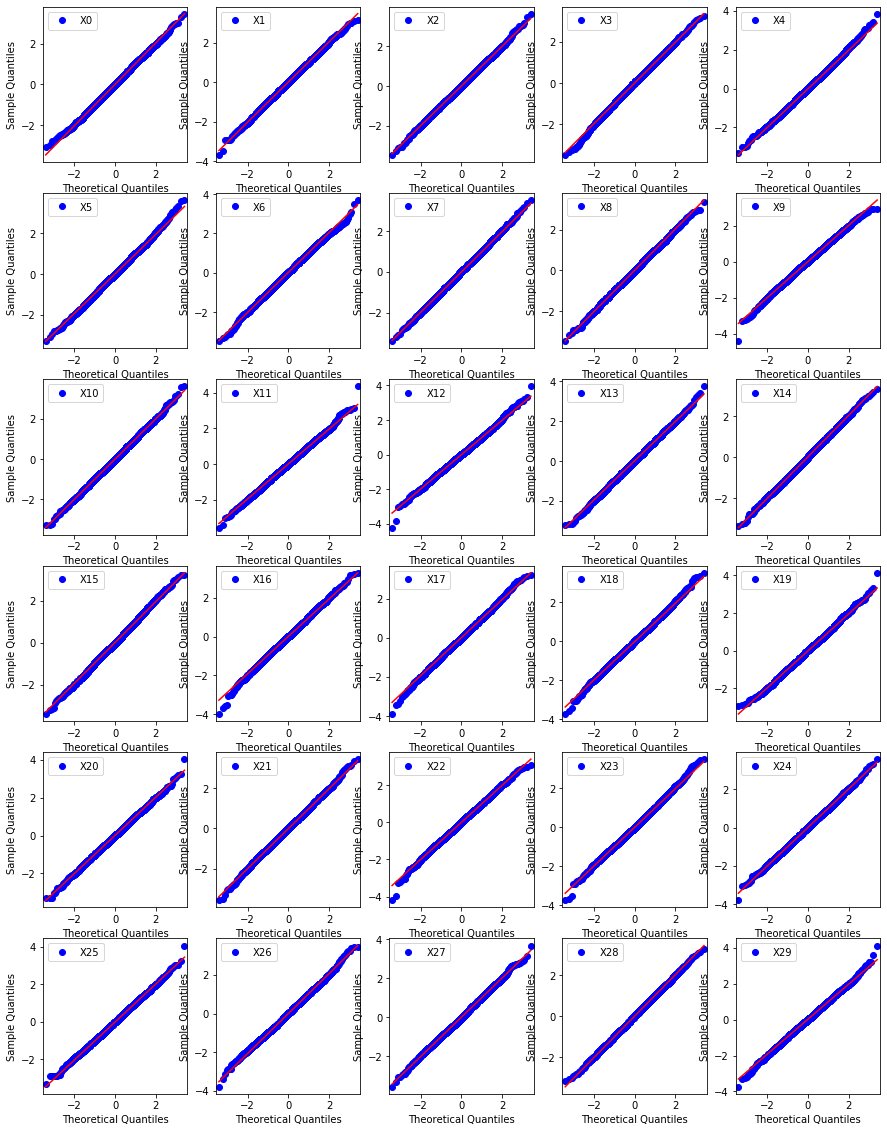

In [28]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15,20))
ax= axes.flatten()
for i, val in enumerate(data.columns.values[:30]):
    sm.qqplot(data[val], fit = True, line='q', ax=ax[i])
    ax[i].legend([val])
plt.show() 

In [38]:
data["XC"].value_counts().reset_index()

,index,XC
0,C,665
1,A,615
2,E,588
3,D,580
4,B,552


In [40]:
XC_val = data["XC"].value_counts().reset_index()
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=XC_val['index'], y=XC_val.XC),
    row=1,
    col=1,)

In [507]:
'''mean_encode = data.groupby('XC')['y'].mean()
data.loc[:, 'XC'] = data.XC.map(mean_encode)
data'''

"mean_encode = data.groupby('XC')['y'].mean()\ndata.loc[:, 'XC'] = data.XC.map(mean_encode)\ndata"

In [508]:
ohc = preprocessing.OneHotEncoder()
ohe = ohc.fit_transform(data.XC.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe, columns=["XC_" + str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])
data = pd.concat([data, dfOneHot], axis=1)
data

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,XC,y,XC_A,XC_B,XC_C,XC_D,XC_E
0,0.985703,0.899527,2.332283,1.044273,1.141718,-1.656647,-1.409265,1.043518,-0.931461,-1.726754,0.149757,0.723953,0.654222,-0.128981,-0.448738,0.001453,1.068472,0.547043,-1.446777,0.846647,1.385378,0.217853,0.628801,0.511403,0.562767,-0.356514,0.867604,-0.218642,-0.336591,0.096781,C,0,0.0,0.0,1.0,0.0,0.0
1,0.539816,0.243602,1.636048,-0.562150,-0.235560,-1.316039,1.529069,-1.415871,-1.167266,-0.103195,1.264812,-0.046112,-0.052789,0.713823,0.489074,1.449449,-0.241008,-1.530879,-0.140254,-2.218684,0.129662,2.020398,0.734907,0.929244,-0.805046,0.268788,1.025799,1.112271,1.492585,-0.497020,E,0,0.0,0.0,0.0,0.0,1.0
2,-1.424483,-0.470533,0.095100,0.131981,1.168902,-0.827530,-1.233111,0.556679,-1.384065,-1.197944,-0.401762,0.242434,-1.063001,-0.000186,-1.625695,0.549367,1.792426,-0.684977,0.380994,-0.007497,0.640268,1.470933,-1.398526,-2.139636,-1.238090,-0.139802,-2.317249,0.113483,0.521594,1.269208,E,0,0.0,0.0,0.0,0.0,1.0
3,-1.034157,-1.054496,0.339467,-0.829151,0.012123,0.048887,0.573195,-0.189184,-0.674289,0.975835,-0.040081,-0.119562,0.765592,-0.589195,0.054909,0.670680,0.034362,-1.151614,-0.598841,0.278923,2.565787,0.881025,0.305298,-0.368107,-0.664859,0.225715,-0.865773,-0.026332,-0.209023,0.074814,E,0,0.0,0.0,0.0,0.0,1.0
4,0.177091,1.154216,1.004133,-0.724015,-0.508090,-0.478284,-0.524431,1.841560,-1.147140,0.435025,-0.385504,-1.895292,0.336079,-0.706587,0.058675,-0.318922,0.252725,-0.756372,-1.619190,-0.413788,0.909173,0.515647,1.095991,-0.993104,-0.775456,0.938553,0.662388,0.483111,-0.910481,1.544431,E,0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.127214,-0.644439,-0.356251,-1.188522,0.646979,-1.018895,-0.153524,-0.102938,1.109257,0.173160,-0.188674,-0.088169,0.843558,1.075656,1.770062,-2.276914,0.136055,1.258887,0.311050,-0.468410,-1.267298,0.828288,-1.362069,-2.267345,0.329806,0.255234,-1.145799,0.673261,-0.072575,0.233888,A,1,1.0,0.0,0.0,0.0,0.0
2996,0.427700,1.460896,-1.260326,2.206359,-0.981929,0.045186,0.406928,-0.409999,0.602068,-1.145479,0.556425,-0.157087,1.636547,0.860019,0.493489,-1.179582,-0.223230,-0.191313,-0.334412,-1.815481,2.045879,0.350893,0.558446,-1.430444,0.067506,-0.865400,0.571944,1.172911,-0.917354,0.126003,C,0,0.0,0.0,1.0,0.0,0.0
2997,-0.880540,0.678472,0.493897,-0.118869,0.005285,-0.201233,-0.601732,-0.747260,-0.413440,-1.144848,0.620897,-0.606322,-1.050082,-0.223199,-1.213268,0.094096,1.385225,1.131449,-2.645446,-2.195989,-0.615433,1.959871,0.924523,-0.304820,0.153800,0.316073,0.243841,-1.641217,0.287025,0.591607,B,1,0.0,1.0,0.0,0.0,0.0
2998,0.151291,-0.949928,-1.960683,-1.352557,2.221015,-0.775556,0.932388,-0.963642,0.649496,-1.658190,1.491049,0.325477,0.077016,-0.563154,-0.598902,0.173198,1.100410,-0.191733,-1.457368,-0.085871,0.786170,-1.576338,0.896517,-0.586427,-0.314806,-0.048052,0.142921,1.057203,-1.335579,-0.108947,B,0,0.0,1.0,0.0,0.0,0.0


In [509]:
data = data.drop(columns=['XC'])
data

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,y,XC_A,XC_B,XC_C,XC_D,XC_E
0,0.985703,0.899527,2.332283,1.044273,1.141718,-1.656647,-1.409265,1.043518,-0.931461,-1.726754,0.149757,0.723953,0.654222,-0.128981,-0.448738,0.001453,1.068472,0.547043,-1.446777,0.846647,1.385378,0.217853,0.628801,0.511403,0.562767,-0.356514,0.867604,-0.218642,-0.336591,0.096781,0,0.0,0.0,1.0,0.0,0.0
1,0.539816,0.243602,1.636048,-0.562150,-0.235560,-1.316039,1.529069,-1.415871,-1.167266,-0.103195,1.264812,-0.046112,-0.052789,0.713823,0.489074,1.449449,-0.241008,-1.530879,-0.140254,-2.218684,0.129662,2.020398,0.734907,0.929244,-0.805046,0.268788,1.025799,1.112271,1.492585,-0.497020,0,0.0,0.0,0.0,0.0,1.0
2,-1.424483,-0.470533,0.095100,0.131981,1.168902,-0.827530,-1.233111,0.556679,-1.384065,-1.197944,-0.401762,0.242434,-1.063001,-0.000186,-1.625695,0.549367,1.792426,-0.684977,0.380994,-0.007497,0.640268,1.470933,-1.398526,-2.139636,-1.238090,-0.139802,-2.317249,0.113483,0.521594,1.269208,0,0.0,0.0,0.0,0.0,1.0
3,-1.034157,-1.054496,0.339467,-0.829151,0.012123,0.048887,0.573195,-0.189184,-0.674289,0.975835,-0.040081,-0.119562,0.765592,-0.589195,0.054909,0.670680,0.034362,-1.151614,-0.598841,0.278923,2.565787,0.881025,0.305298,-0.368107,-0.664859,0.225715,-0.865773,-0.026332,-0.209023,0.074814,0,0.0,0.0,0.0,0.0,1.0
4,0.177091,1.154216,1.004133,-0.724015,-0.508090,-0.478284,-0.524431,1.841560,-1.147140,0.435025,-0.385504,-1.895292,0.336079,-0.706587,0.058675,-0.318922,0.252725,-0.756372,-1.619190,-0.413788,0.909173,0.515647,1.095991,-0.993104,-0.775456,0.938553,0.662388,0.483111,-0.910481,1.544431,0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.127214,-0.644439,-0.356251,-1.188522,0.646979,-1.018895,-0.153524,-0.102938,1.109257,0.173160,-0.188674,-0.088169,0.843558,1.075656,1.770062,-2.276914,0.136055,1.258887,0.311050,-0.468410,-1.267298,0.828288,-1.362069,-2.267345,0.329806,0.255234,-1.145799,0.673261,-0.072575,0.233888,1,1.0,0.0,0.0,0.0,0.0
2996,0.427700,1.460896,-1.260326,2.206359,-0.981929,0.045186,0.406928,-0.409999,0.602068,-1.145479,0.556425,-0.157087,1.636547,0.860019,0.493489,-1.179582,-0.223230,-0.191313,-0.334412,-1.815481,2.045879,0.350893,0.558446,-1.430444,0.067506,-0.865400,0.571944,1.172911,-0.917354,0.126003,0,0.0,0.0,1.0,0.0,0.0
2997,-0.880540,0.678472,0.493897,-0.118869,0.005285,-0.201233,-0.601732,-0.747260,-0.413440,-1.144848,0.620897,-0.606322,-1.050082,-0.223199,-1.213268,0.094096,1.385225,1.131449,-2.645446,-2.195989,-0.615433,1.959871,0.924523,-0.304820,0.153800,0.316073,0.243841,-1.641217,0.287025,0.591607,1,0.0,1.0,0.0,0.0,0.0
2998,0.151291,-0.949928,-1.960683,-1.352557,2.221015,-0.775556,0.932388,-0.963642,0.649496,-1.658190,1.491049,0.325477,0.077016,-0.563154,-0.598902,0.173198,1.100410,-0.191733,-1.457368,-0.085871,0.786170,-1.576338,0.896517,-0.586427,-0.314806,-0.048052,0.142921,1.057203,-1.335579,-0.108947,0,0.0,1.0,0.0,0.0,0.0


In [510]:
rho = data.corr().round(2)
pval = data.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: "".join(["*" for t in [0.01, 0.05, 0.1] if x <= t]))
rho.astype(str) + p

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,y,XC_A,XC_B,XC_C,XC_D,XC_E
X0,1.0***,0.01,0.01,-0.02,-0.06***,0.01,0.02,0.04**,-0.01,-0.01,-0.0,0.01,-0.03,0.03,0.01,-0.03*,-0.03,0.0,-0.0,0.01,0.01,-0.04**,-0.03,-0.01,-0.02,-0.02,-0.01,0.03*,0.03,-0.02,0.04**,-0.02,0.01,-0.0,-0.01,0.02
X1,0.01,1.0***,-0.03*,0.0,0.01,0.01,-0.02,0.0,-0.02,-0.04**,0.01,-0.01,0.02,-0.01,0.02,0.0,0.02,-0.01,0.03*,0.0,0.0,-0.02,-0.01,0.03,-0.03*,-0.0,0.02,0.0,-0.0,-0.0,0.03*,-0.0,-0.01,0.02,-0.02,0.01
X2,0.01,-0.03*,1.0***,-0.01,-0.02,-0.04**,-0.0,0.0,0.01,-0.03*,0.01,-0.01,0.0,0.02,-0.02,0.0,-0.01,-0.0,-0.01,-0.0,0.01,0.01,0.01,-0.02,-0.02,-0.02,-0.02,0.01,0.02,-0.04**,-0.2***,0.0,-0.04*,0.02,0.01,0.0
X3,-0.02,0.0,-0.01,1.0***,0.0,-0.03,-0.02,-0.02,-0.01,0.01,0.0,-0.04**,-0.02,-0.01,0.02,-0.02,0.0,-0.03,0.02,-0.0,-0.0,-0.02,-0.0,0.0,0.01,0.03*,-0.01,-0.02,-0.02,0.01,-0.15***,0.02,-0.03,-0.0,0.01,0.0
X4,-0.06***,0.01,-0.02,0.0,1.0***,-0.02,-0.02,-0.0,-0.0,0.01,-0.03,0.01,0.01,0.0,0.02,0.02,0.01,-0.01,-0.02,0.01,-0.0,-0.01,-0.01,-0.0,-0.01,0.02,0.01,-0.0,0.02,-0.0,-0.19***,-0.01,0.02,0.0,0.01,-0.02
X5,0.01,0.01,-0.04**,-0.03,-0.02,1.0***,0.02,0.02,0.01,0.02,-0.0,0.03,0.01,0.03,0.02,-0.01,-0.01,-0.01,0.0,0.02,0.01,-0.03,-0.03,-0.05***,-0.0,-0.0,-0.01,0.02,-0.02,0.03*,0.02,-0.0,0.04**,-0.0,-0.01,-0.02
X6,0.02,-0.02,-0.0,-0.02,-0.02,0.02,1.0***,0.01,0.01,-0.01,0.03*,-0.02,-0.03,-0.01,0.02,0.01,0.02,0.0,-0.03,0.02,-0.0,0.01,0.01,-0.01,-0.0,-0.0,0.02,-0.01,0.01,0.02,-0.17***,0.01,0.01,-0.01,-0.02,0.01
X7,0.04**,0.0,0.0,-0.02,-0.0,0.02,0.01,1.0***,0.02,-0.03*,-0.01,0.0,0.01,-0.02,0.03*,-0.04**,0.01,-0.03,-0.0,0.01,-0.01,0.01,0.02,-0.01,0.01,-0.02,0.0,0.02,0.04**,0.01,-0.18***,0.01,-0.0,-0.0,-0.01,-0.0
X8,-0.01,-0.02,0.01,-0.01,-0.0,0.01,0.01,0.02,1.0***,-0.03,-0.0,0.01,0.01,0.02,0.01,-0.01,0.03*,-0.01,-0.02,-0.01,-0.0,-0.02,0.01,-0.02,0.06***,-0.02,-0.02,-0.01,-0.01,-0.01,0.01,0.01,0.03,0.01,-0.04*,-0.02
X9,-0.01,-0.04**,-0.03*,0.01,0.01,0.02,-0.01,-0.03*,-0.03,1.0***,-0.01,0.01,0.02,0.01,0.05***,-0.0,0.0,-0.0,0.0,0.0,0.02,-0.0,-0.02,-0.01,0.02,-0.03,-0.01,-0.0,-0.01,0.02,0.01,0.02,0.02,0.0,-0.02,-0.02


In [511]:
num1 = (data[['X7', 'X11']].corr().iloc[0,1]*data[['y', 'X11']].corr().iloc[0,1]) - (data[['X7', 'y']].corr().iloc[0,1]*np.var(data['X11']))
den1 = (data[['X7', 'X11']].corr().iloc[0,1]*data[['y', 'X7']].corr().iloc[0,1]) - (data[['X11', 'y']].corr().iloc[0,1]*np.var(data['X7']))

In [512]:
data['X7_11'] = (num1/den1*data['X7']) + data['X11']

In [513]:
num2 = (data[['X17', 'X21']].corr().iloc[0,1]*data[['y', 'X21']].corr().iloc[0,1]) - (data[['X17', 'y']].corr().iloc[0,1]*np.var(data['X21']))
den2 = (data[['X17', 'X21']].corr().iloc[0,1]*data[['y', 'X17']].corr().iloc[0,1]) - (data[['X21', 'y']].corr().iloc[0,1]*np.var(data['X17']))

In [514]:
data['X17_21'] = (num2/den2*data['X17']) + data['X21']

In [515]:
num3 = (data[['X17_21', 'X7_11']].corr().iloc[0,1]*data[['y', 'X7_11']].corr().iloc[0,1]) - (data[['X17_21', 'y']].corr().iloc[0,1]*np.var(data['X7_11']))
den3 = (data[['X17_21', 'X7_11']].corr().iloc[0,1]*data[['y', 'X17_21']].corr().iloc[0,1]) - (data[['X7_11', 'y']].corr().iloc[0,1]*np.var(data['X17_21']))

In [516]:
data['X7_11_17_21'] = (num3/den3*data['X17_21']) + data['X7_11']

In [517]:
num4 = (data[['X1', 'X23']].corr().iloc[0,1]*data[['y', 'X23']].corr().iloc[0,1]) - (data[['X1', 'y']].corr().iloc[0,1]*np.var(data['X23']))
den4 = (data[['X1', 'X23']].corr().iloc[0,1]*data[['y', 'X1']].corr().iloc[0,1]) - (data[['X23', 'y']].corr().iloc[0,1]*np.var(data['X1']))

In [518]:
data['X1_23'] = (num4/den4*data['X1']) + data['X23']

In [519]:
num5 = (data[['X22', 'X26']].corr().iloc[0,1]*data[['y', 'X26']].corr().iloc[0,1]) - (data[['X22', 'y']].corr().iloc[0,1]*np.var(data['X26']))
den5 = (data[['X22', 'X26']].corr().iloc[0,1]*data[['y', 'X22']].corr().iloc[0,1]) - (data[['X26', 'y']].corr().iloc[0,1]*np.var(data['X22']))

In [520]:
data['X22_26'] = (num5/den5*data['X22']) + data['X26']

In [521]:
num6 = (data[['X15', 'X19']].corr().iloc[0,1]*data[['y', 'X19']].corr().iloc[0,1]) - (data[['X15', 'y']].corr().iloc[0,1]*np.var(data['X19']))
den6 = (data[['X15', 'X19']].corr().iloc[0,1]*data[['y', 'X15']].corr().iloc[0,1]) - (data[['X19', 'y']].corr().iloc[0,1]*np.var(data['X15']))

In [522]:
data['X15_19'] = (num6/den6*data['X15']) + data['X19']

In [523]:
num7 = (data[['X4', 'X25']].corr().iloc[0,1]*data[['y', 'X25']].corr().iloc[0,1]) - (data[['X4', 'y']].corr().iloc[0,1]*np.var(data['X25']))
den7 = (data[['X4', 'X25']].corr().iloc[0,1]*data[['y', 'X4']].corr().iloc[0,1]) - (data[['X25', 'y']].corr().iloc[0,1]*np.var(data['X4']))

In [524]:
data['X4_25'] = (num7/den7*data['X4']) + data['X25']

In [525]:
num8 = (data[['X4_25', 'X15_19']].corr().iloc[0,1]*data[['y', 'X15_19']].corr().iloc[0,1]) - (data[['X4_25', 'y']].corr().iloc[0,1]*np.var(data['X15_19']))
den8 = (data[['X4_25', 'X15_19']].corr().iloc[0,1]*data[['y', 'X4_25']].corr().iloc[0,1]) - (data[['X15_19', 'y']].corr().iloc[0,1]*np.var(data['X4_25']))

In [526]:
data['X4_15_19_25'] = (num8/den8*data['X4_25']) + data['X15_19']

num9 = (data[['XC_B', 'XC_D']].corr().iloc[0,1]*data[['y', 'XC_D']].corr().iloc[0,1]) + (data[['XC_B', 'y']].corr().iloc[0,1]*np.var(data['XC_D']))
den9 = (data[['XC_B', 'XC_D']].corr().iloc[0,1]*data[['y', 'XC_B']].corr().iloc[0,1]) + (data[['XC_D', 'y']].corr().iloc[0,1]*np.var(data['XC_B']))

data['XC_B_D'] = (-num9/den9*data['XC_B']) + data['XC_D']

In [527]:
# List of statistically insignifant values which were found on analysis to 'y'
data = data.drop(
    [
        "X1",
        'X4',
        'X4_25',
        "X5",
        "X8",
        "X7",
        "X7_11",
        "X9",
        "X10",
        "X11",
        "X12",
        "X13",
        "X14",
        'X15',
        'X15_19',
        "X16",
        "X17",
        'X19',
        "X17_21",
        "X18",
        "X21",
        "X22",
        "X23",
        "X24",
        'X25',
        "X26",
        "X28",
        "X29",
        "XC_C",
    ],
    axis=1,
)

In [528]:
rho = data.corr().round(2)
pval = data.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: "".join(["*" for t in [0.01, 0.05, 0.1] if x <= t]))
rho.astype(str) + p

,X0,X2,X3,X6,X20,X27,y,XC_A,XC_B,XC_D,XC_E,X7_11_17_21,X1_23,X22_26,X4_15_19_25
X0,1.0***,0.01,-0.02,0.02,0.01,0.03*,0.04**,-0.02,0.01,-0.01,0.02,0.01,-0.0,-0.02,-0.05***
X2,0.01,1.0***,-0.01,-0.0,0.01,0.01,-0.2***,0.0,-0.04*,0.01,0.0,0.0,-0.03*,-0.01,-0.02
X3,-0.02,-0.01,1.0***,-0.02,-0.0,-0.02,-0.15***,0.02,-0.03,0.01,0.0,-0.05***,0.0,-0.01,0.0
X6,0.02,-0.0,-0.02,1.0***,-0.0,-0.01,-0.17***,0.01,0.01,-0.02,0.01,0.0,-0.02,0.02,0.01
X20,0.01,0.01,-0.0,-0.0,1.0***,0.01,-0.16***,0.0,-0.0,0.0,-0.01,-0.01,-0.03,-0.03,-0.01
X27,0.03*,0.01,-0.02,-0.01,0.01,1.0***,-0.2***,-0.01,0.01,-0.01,-0.01,0.01,-0.0,-0.02,0.01
y,0.04**,-0.2***,-0.15***,-0.17***,-0.16***,-0.2***,1.0***,0.15***,0.1***,-0.1***,-0.14***,-0.36***,0.05**,-0.3***,-0.37***
XC_A,-0.02,0.0,0.02,0.01,0.0,-0.01,0.15***,1.0***,-0.24***,-0.25***,-0.25***,0.03*,-0.0,0.04**,0.01
XC_B,0.01,-0.04*,-0.03,0.01,-0.0,0.01,0.1***,-0.24***,1.0***,-0.23***,-0.23***,0.01,-0.01,-0.02,0.02
XC_D,-0.01,0.01,0.01,-0.02,0.0,-0.01,-0.1***,-0.25***,-0.23***,1.0***,-0.24***,0.0,0.01,-0.03,0.02


In [536]:
data

,X0,X2,X3,X6,X20,X27,y,XC_A,XC_B,XC_D,XC_E,X7_11_17_21,X1_23,X22_26,X4_15_19_25
0,0.985703,2.332283,1.044273,-1.409265,1.385378,-0.218642,0,0.0,0.0,0.0,0.0,2.506144,1.241760,1.470171,1.674117
1,0.539816,1.636048,-0.562150,1.529069,0.129662,1.112271,0,0.0,0.0,0.0,1.0,-1.049216,1.127033,1.730044,-0.696200
2,-1.424483,0.095100,0.131981,-1.233111,0.640268,0.113483,0,0.0,0.0,0.0,1.0,1.526011,-2.521678,-3.657426,1.630975
3,-1.034157,0.339467,-0.829151,0.573195,2.565787,-0.026332,0,0.0,0.0,0.0,1.0,-0.589643,-1.224289,-0.573213,1.210181
4,0.177091,1.004133,-0.724015,-0.524431,0.909173,0.483111,0,0.0,0.0,0.0,1.0,-0.279954,-0.055956,1.712653,-0.331024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.127214,-0.356251,-1.188522,-0.153524,-1.267298,0.673261,1,1.0,0.0,0.0,0.0,1.793292,-2.790587,-2.451040,-1.895780
2996,0.427700,-1.260326,2.206359,0.406928,2.045879,1.172911,0,0.0,0.0,0.0,0.0,-0.425270,-0.244293,1.107090,-4.916658
2997,-0.880540,0.493897,-0.118869,-0.601732,-0.615433,-1.641217,1,0.0,1.0,0.0,0.0,1.564062,0.246055,1.129791,-1.777225
2998,0.151291,-1.960683,-1.352557,0.932388,0.786170,1.057203,0,0.0,1.0,0.0,0.0,-2.309121,-1.357706,1.002033,2.345330


In [529]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(["y",], axis=1,), data["y"], test_size=0.30, random_state=71,
)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [530]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       626
           1       0.99      1.00      0.99       274

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [531]:
accuracy_score(y_test,predictions)

0.9966666666666667

In [535]:
f1_score(y_test,predictions)

0.9945355191256832